### Analisis exploratorio de los datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import fisher_exact
import math
import seaborn as sns

In [ ]:
table = np.array([[21, 14],
                  [15, 3]])

# Calcular OR y p-valor con Fisher exact
oddsratio, p_value = fisher_exact(table)
# log(OR)
log_or = math.log(oddsratio)
se = math.sqrt(1/21 + 1/14 + 1/15 + 1/3)
z = 1.96
ci_lower = math.exp(log_or - z * se)
ci_upper = math.exp(log_or + z * se)
print(f"OR = {oddsratio:.2f} (IC95%: {ci_lower:.2f} – {ci_upper:.2f}), p = {p_value:.3f}")

OR = 0.30 (IC95%: 0.07 – 1.23), p = 0.123


In [ ]:
table = np.array([[29, 7],
                  [11, 6]])
oddsratio, p_value = fisher_exact(table)
log_or = math.log(oddsratio)
se = math.sqrt(1/29 + 1/7 + 1/11 + 1/6)
z = 1.96
ci_lower = math.exp(log_or - z * se)
ci_upper = math.exp(log_or + z * se)
print(f"OR = {oddsratio:.2f} (IC95%: {ci_lower:.2f} – {ci_upper:.2f}), p = {p_value:.3f}")

OR = 2.26 (IC95%: 0.62 – 8.23), p = 0.306


In [4]:
df = pd.read_excel('Socieconomico.xlsx')
df.columns #variables 

Index(['Id', 'Edad', 'Sexo', 'Tiempo de estancia en UCI (en dias).',
       '¿Presenta alguna de las siguientes enfermedades crónicas?\n(Puede seleccionar más de una opción)',
       '  Medicamentos formulados\n  (Puede seleccionar más de una opción)',
       '  ¿Cuál es la dosis del fármaco que administra al paciente? (Por favor, especifique la cantidad exacta, incluyendo la unidad de medida)  ',
       '  ¿Cuál es la vía de administración del fármaco que administra al paciente?  '],
      dtype='object')

## Objetivo 1

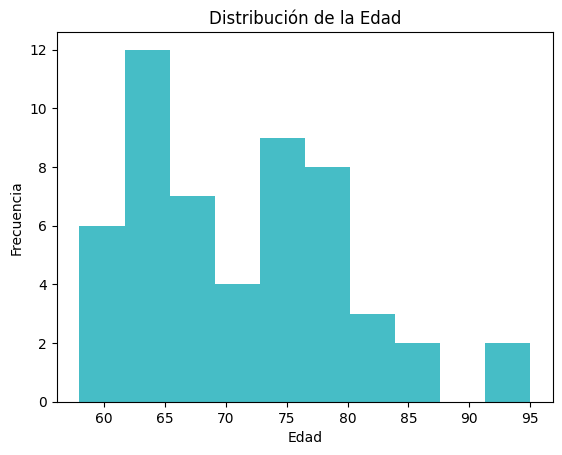

In [23]:
fig, ax = plt.subplots()
ax.hist(df['Edad'], color="#46BDC6")
plt.title("Distribución de la Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

In [5]:
bins = [54, 64, 74, 84, 100]
labels = ['55-64', '65-74', '75-84', '85+']
df['Grupo de Edad'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=True)

C:\Users\KELLY\AppData\Local\Temp\ipykernel_29564\2443322882.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = df.groupby(['Grupo de Edad', 'Sexo']).size().unstack(fill_value=0)


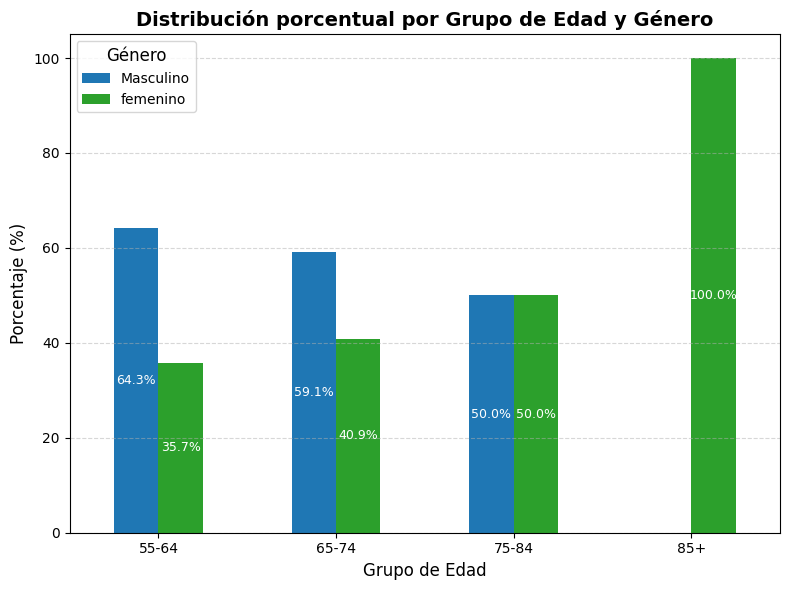

In [ ]:
colores = {
    'Masculino': '#1f77b4',
    'femenino': '#2ca02c'   
}
conteo = df.groupby(['Grupo de Edad', 'Sexo']).size().unstack(fill_value=0)
porcentajes = conteo.div(conteo.sum(axis=1), axis=0) * 100
ax = porcentajes.plot(kind='bar', figsize=(8, 6),
                      color=[colores.get(col, '#cccccc') for col in porcentajes.columns])
plt.title('Distribución porcentual por Grupo de Edad y Género', fontsize=14, fontweight='bold')
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.legend(title='Género', title_fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2, p.get_y() + height / 2), 
                    ha='center', va='center', fontsize=9, color='white')

plt.tight_layout()
plt.show()


In [ ]:
df['Cantidad de Enfermedades'] = df['¿Presenta alguna de las siguientes enfermedades crónicas?\n(Puede seleccionar más de una opción)'].str.split(',').apply(len)
df['Cantidad de Medicamentos'] = df['  Medicamentos formulados\n  (Puede seleccionar más de una opción)'].str.split(',').apply(len)
df[['¿Presenta alguna de las siguientes enfermedades crónicas?\n(Puede seleccionar más de una opción)', 'Cantidad de Enfermedades','Cantidad de Medicamentos']].head(10)


,Cantidad de Enfermedades,Cantidad de Medicamentos
0,1,1
1,2,1
2,1,2
3,2,1
4,3,3
5,1,1
6,1,1
7,3,1
8,4,2
9,1,1


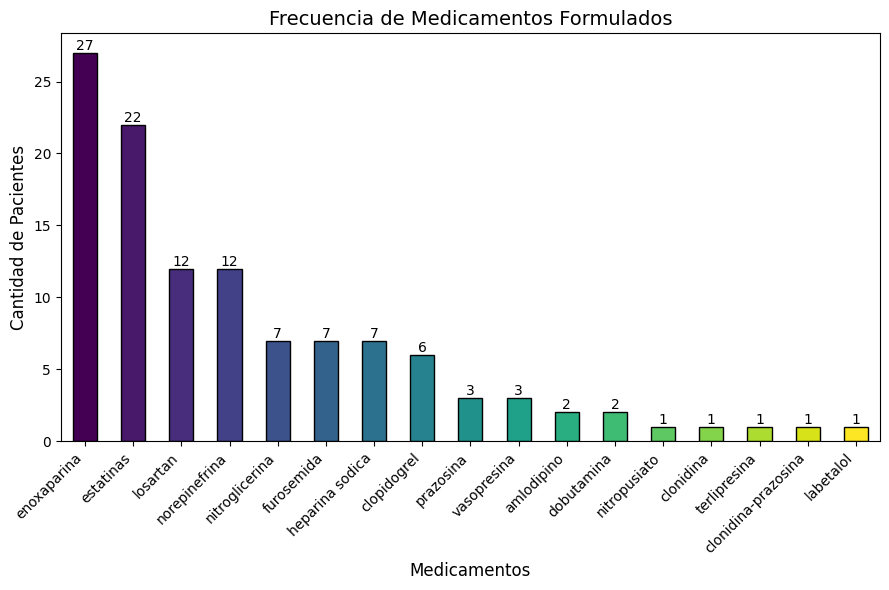

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
medicamentos = df['  Medicamentos formulados\n  (Puede seleccionar más de una opción)'] \
    .str.split(',') \
    .explode() \
    .str.strip() \
    .str.lower() \
    .value_counts()

plt.figure(figsize=(9, 6))
colores_medicamentos = plt.cm.viridis(np.linspace(0, 1, len(medicamentos)))
ax1 = medicamentos.plot(kind='bar', color=colores_medicamentos, edgecolor='black')
plt.title('Frecuencia de Medicamentos Formulados', fontsize=14)
plt.xlabel('Medicamentos', fontsize=12)
plt.ylabel('Cantidad de Pacientes', fontsize=12)
plt.xticks(rotation=45, ha='right')
for p in ax1.patches:
    height = p.get_height()
    if height > 0:
        ax1.annotate(f'{int(height)}', 
                     (p.get_x() + p.get_width() / 2, height), 
                     ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
medicamentos_ = df['  Medicamentos formulados\n  (Puede seleccionar más de una opción)'] \
    .dropna() \
    .str.lower().str.strip().str.split(',') \
    .explode().str.strip()
frecuencia = medicamentos_.value_counts().reset_index()
frecuencia.columns = ['Enfermedad', 'Frecuencia']
print(frecuencia)

             Enfermedad  Frecuencia
0           enoxaparina          27
1             estatinas          22
2              losartan          12
3         norepinefrina          12
4        nitroglicerina           7
5            furosemida           7
6       heparina sodica           7
7           clopidogrel           6
8             prazosina           3
9           vasopresina           3
10           amlodipino           2
11           dobutamina           2
12         nitropusiato           1
13            clonidina           1
14         terlipresina           1
15  clonidina-prazosina           1
16            labetalol           1


In [ ]:
bins = [0, 3, float('inf')]  # Rango menor que 3 medicamentos, 3 o más medicamentos
labels = ['Menor que 3', '3 o más']  
df['Cantidad de Medicamentos Categorica'] = pd.cut(df['Cantidad de Medicamentos'], bins=bins, labels=labels, right=False)
print(df[['Cantidad de Medicamentos', 'Cantidad de Medicamentos Categorica']].head())

   Cantidad de Medicamentos Cantidad de Medicamentos Categorica
0                         1                         Menor que 3
1                         1                         Menor que 3
2                         2                         Menor que 3
3                         1                         Menor que 3
4                         3                             3 o más


C:\Users\KELLY\AppData\Local\Temp\ipykernel_29564\388104843.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = df.groupby(['Grupo de Edad', 'Cantidad de Medicamentos Categorica']).size().unstack(fill_value=0)


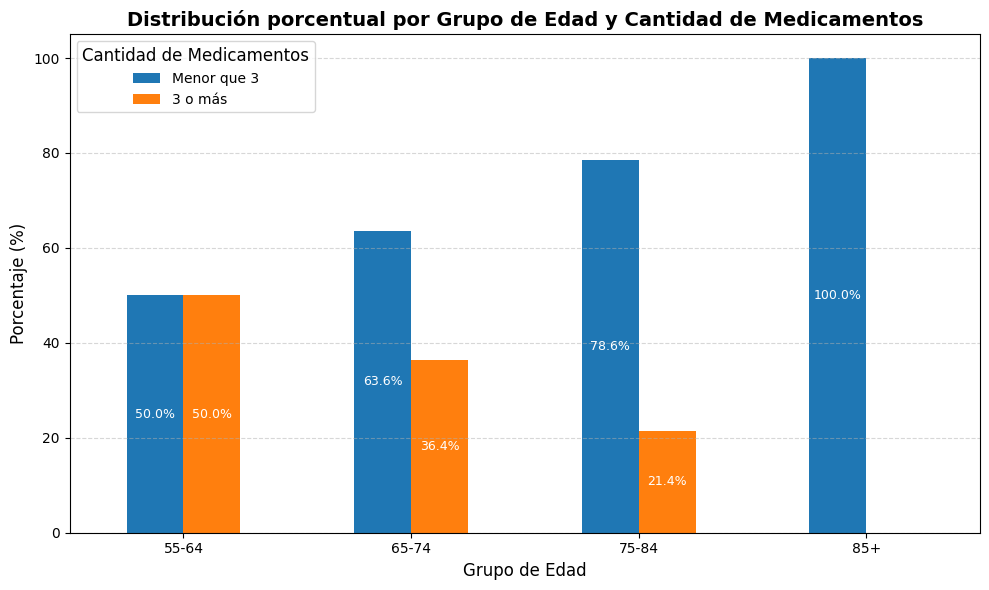

In [ ]:
conteo = df.groupby(['Grupo de Edad', 'Cantidad de Medicamentos Categorica']).size().unstack(fill_value=0)
porcentajes = conteo.div(conteo.sum(axis=1), axis=0) * 100
colores = {
    'Menor que 3': '#1f77b4',
     '3 o más': '#ff7f0e'
}
ax = porcentajes.plot(kind='bar', figsize=(10, 6),
                      color=[colores.get(col, '#cccccc') for col in porcentajes.columns])

plt.title('Distribución porcentual por Grupo de Edad y Cantidad de Medicamentos', fontsize=14, fontweight='bold')
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.legend(title='Cantidad de Medicamentos', title_fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2, p.get_y() + height / 2), 
                    ha='center', va='center', fontsize=9, color='white')

plt.tight_layout()
plt.show()


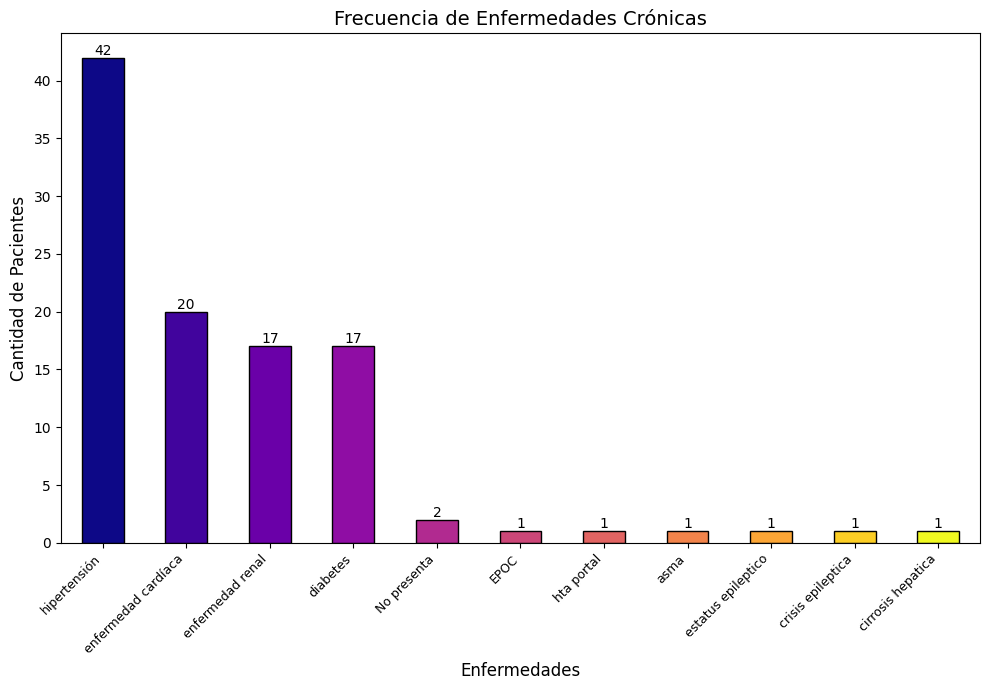

In [ ]:
enfermedades = df['¿Presenta alguna de las siguientes enfermedades crónicas?\n(Puede seleccionar más de una opción)']\
    .str.split(',') \
    .explode() \
    .str.strip() \
    .str.lower() \
    .value_counts()

abreviaciones = {
    'No presenta enfermedades crónicas': 'No presenta',
    'no presenta enfermedades crónicas': 'No presenta',
    'Enfermedad pulmonar obstructiva crónica (EPOC)': 'EPOC',
    'enfermedad pulmonar obstructiva crónica (epoc)': 'EPOC'
}
enfermedades.index = enfermedades.index.map(lambda x: abreviaciones.get(x.strip(), x.strip()))
colores_enfermedades = plt.cm.plasma(np.linspace(0, 1, len(enfermedades)))
plt.figure(figsize=(10, 7))
ax2 = enfermedades.plot(kind='bar', color=colores_enfermedades, edgecolor='black')
plt.title('Frecuencia de Enfermedades Crónicas', fontsize=14)
plt.xlabel('Enfermedades', fontsize=12)
plt.ylabel('Cantidad de Pacientes', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)
for p in ax2.patches:
    height = p.get_height()
    if height > 0:
        ax2.annotate(f'{int(height)}',
                     (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



In [ ]:
enfermedades = df['¿Presenta alguna de las siguientes enfermedades crónicas?\n(Puede seleccionar más de una opción)'] \
    .dropna() \
    .str.lower().str.strip().str.split(',') \
    .explode().str.strip()
frecuencia = enfermedades.value_counts().reset_index()
frecuencia.columns = ['Enfermedad', 'Frecuencia']

print(frecuencia)

                                        Enfermedad  Frecuencia
0                                     hipertensión          42
1                              enfermedad cardíaca          20
2                                 enfermedad renal          17
3                                         diabetes          17
4                no presenta enfermedades crónicas           2
5   enfermedad pulmonar obstructiva crónica (epoc)           1
6                                       hta portal           1
7                                             asma           1
8                               estatus epileptico           1
9                                crisis epileptica           1
10                               cirrosis hepatica           1


   Cantidad de Enfermedades Cantidad de Enfermedades Categorica
0                         1             2 Enfermedades o menos 
1                         2             2 Enfermedades o menos 
2                         1             2 Enfermedades o menos 
3                         2             2 Enfermedades o menos 
4                         3                 3 Efermedades o más


C:\Users\KELLY\AppData\Local\Temp\ipykernel_13072\1538064251.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_ = df.groupby(['Grupo de Edad', 'Cantidad de Enfermedades Categorica']).size().unstack(fill_value=0)


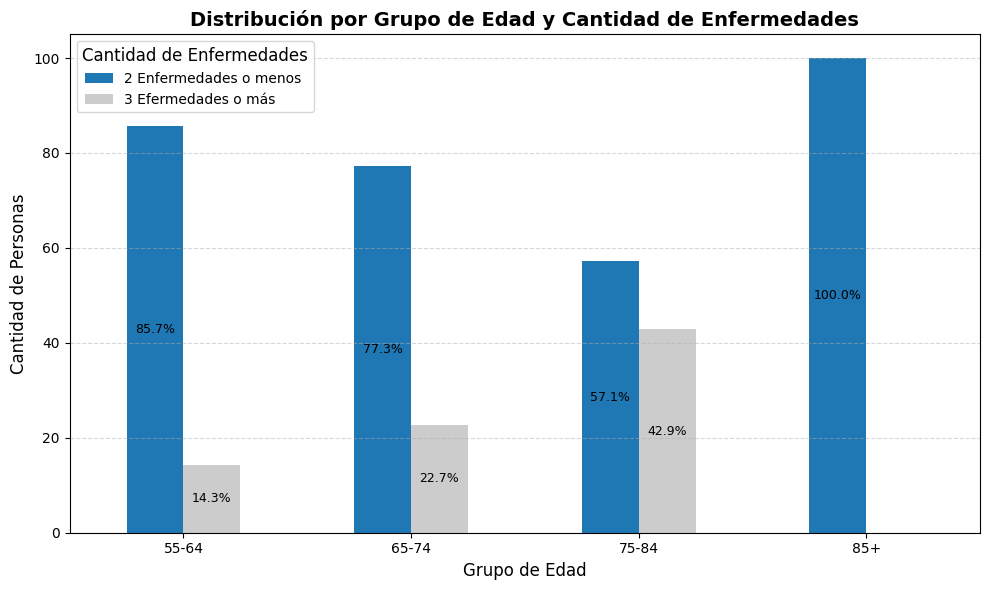

In [ ]:
bins = [1, 3, 5] 
labels = ['2 Enfermedades o menos ', '3 Efermedades o más']  
df['Cantidad de Enfermedades Categorica'] = pd.cut(df['Cantidad de Enfermedades'], bins=bins, labels=labels, right=False)
print(df[['Cantidad de Enfermedades', 'Cantidad de Enfermedades Categorica']].head())
conteo_ = df.groupby(['Grupo de Edad', 'Cantidad de Enfermedades Categorica']).size().unstack(fill_value=0)
porcentajes = conteo.div(conteo.sum(axis=1), axis=0) * 100
colores = {
    '2 Enfermedades o menos ': '#1f77b4',
    '3 Enfermedades o más': '#ff7f0e'
}
ax = porcentajes.plot(kind='bar', figsize=(10, 6),
                 color=[colores.get(col, '#cccccc') for col in porcentajes.columns])
plt.title('Distribución por Grupo de Edad y Cantidad de Enfermedades', fontsize=14, fontweight='bold')
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Cantidad de Personas', fontsize=12)
plt.legend(title='Cantidad de Enfermedades', title_fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2, p.get_y() + height / 2), 
                    ha='center', va='center', fontsize=9, color='black')
plt.tight_layout()
plt.show()


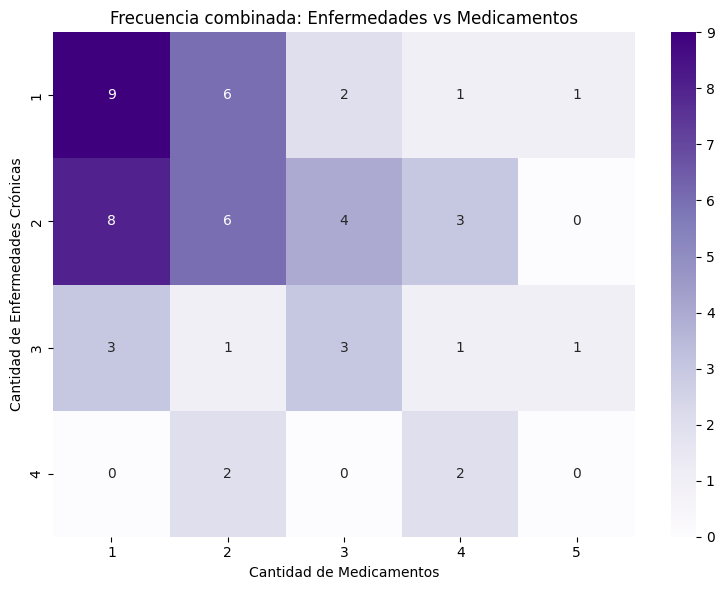

In [ ]:

df['Cantidad de Enfermedades']=df['Cantidad de Enfermedades'].astype(int)
df['Cantidad de Medicamentos']=df['Cantidad de Medicamentos'].astype(int)
tabla = df.groupby(['Cantidad de Enfermedades', 'Cantidad de Medicamentos']).size().unstack(fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(tabla, annot=True, fmt='d', cmap='Purples', cbar=True)
plt.title('Frecuencia combinada: Enfermedades vs Medicamentos')
plt.xlabel('Cantidad de Medicamentos')
plt.ylabel('Cantidad de Enfermedades Crónicas')
plt.tight_layout()
plt.show()


In [ ]:
adminis = df['  ¿Cuál es la vía de administración del fármaco que administra al paciente?  '] \
    .dropna() \
    .str.lower().str.strip().str.split(',') \
    .explode().str.strip()
frecuencia = enfermedades.value_counts().reset_index()
frecuencia.columns = ['Enfermedad', 'Frecuencia']
print(frecuencia)

                 Enfermedad  Frecuencia
0           subcutánea (sc)          30
1          intravenosa (iv)          26
2            via oral (v.o)          26
3  sonda nasogastrica (sng)           1


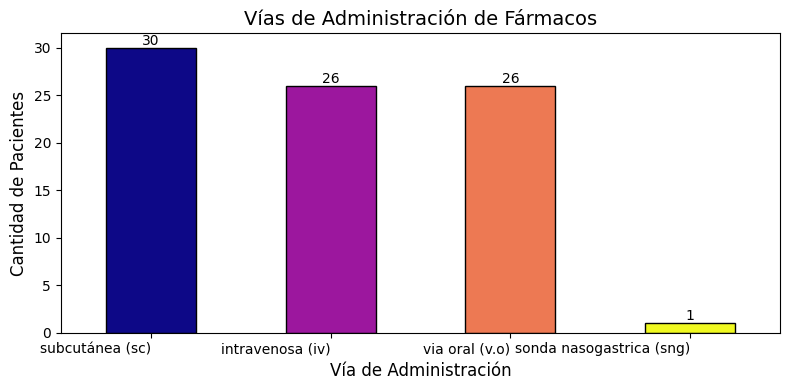

In [ ]:
adminis = df['  ¿Cuál es la vía de administración del fármaco que administra al paciente?  '] \
    .dropna() \
    .str.lower().str.strip().str.split(',') \
    .explode().str.strip()
frecuencias = adminis.value_counts()
colores = plt.cm.plasma(np.linspace(0, 1, len(frecuencias)))
plt.figure(figsize=(8, 4))
ax = frecuencias.plot(kind='bar', color=colores)
plt.title('Vías de Administración de Fármacos', fontsize=14)
plt.xlabel('Vía de Administración', fontsize=12)
plt.ylabel('Cantidad de Pacientes', fontsize=12)
plt.xticks(rotation= 0, ha='right')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()




## Objetivo 2

In [ ]:
df2=pd.read_excel('CRIMECRI  RESPUESTAS.xlsx')
df2 = df2.drop(columns=['Hora de inicio', 'Hora de finalización'], errors='ignore')

In [ ]:
recomendaciones = df2["¿Utilizó alguna recomendación de los criterios de la herramienta?."].value_counts()
print("Uso de recomendaciones de la herramienta:")
print(recomendaciones)

Uso de recomendaciones de la herramienta:
¿Utilizó alguna recomendación de los criterios de la herramienta?.
SI    50
NO     3
Name: count, dtype: int64


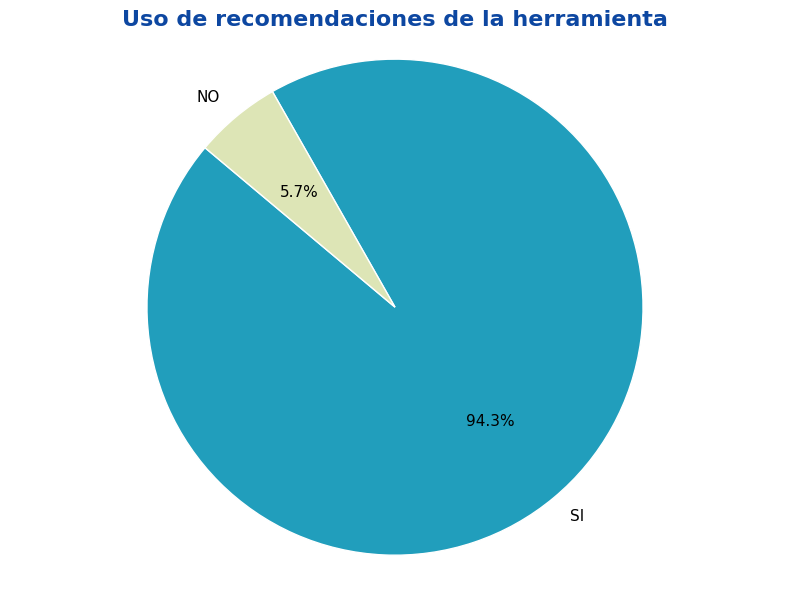

In [ ]:
colores_azules = ['#219ebc', '#dde5b6'] 
plt.figure(figsize=(8, 6))
plt.pie(
    recomendaciones,
    labels=recomendaciones.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colores_azules[:len(recomendaciones)],
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    textprops={'fontsize': 11}  
)
plt.title("Uso de recomendaciones de la herramienta", fontsize=16, color='#0d47a1', weight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
def clasificar_recomendacion(texto):
    if pd.isna(texto) or str(texto).strip() == "":
        return "Sin dato"
    texto = str(texto).lower()
    if "todas" in texto:
        return "Todas"
    elif "sangrado" in texto or "coagulación" in texto or "clopidogrel" in texto:
        return "Vigilancia de sangrado"
    elif "potasio" in texto or "katrol" in texto:
        return "Vigilancia de potasio"
    elif "signos vitales" in texto or "sv" in texto or "tensión arterial" in texto or "t/a" in texto or "cifras tensionales" in texto or "control hemodinámico" in texto:
        return "Signos vitales"
    elif "renal" in texto or "función renal" in texto:
        return "Función renal/hepática"
    elif "hepatica" in texto:
        return "Función renal/hepática"
    elif "ekg" in texto or "electrocardio" in texto or "arritmia" in texto:
        return "EKG"
    elif "gastrointestinales" in texto or "molestias" in texto or "síntomas" in texto and "gastro" in texto:
        return "Vigilancia síntomas gastrointestinales"
    elif "eventos adversos" in texto:
        return "Eventos adversos"
    elif "cuidados de enfermeria" in texto:
        return "Cuidados de enfermería"
    elif "monitorizcion" in texto or "monitorizacion" in texto:
        return "monitorizacion estricta"
    elif "c" in texto and texto.strip().startswith("c"):
        return "Código clínico (otros)"
    else:
        return "Otra"


In [65]:
categoria = pd.read_excel('frecuencia_recomendaciones.xlsx')
categoria = categoria.drop(columns=['Frecuencia'], errors='ignore')
categoria

,Recomendación,Categoria
0,vigilancia de sangrado,Vigilancia de sangrado
1,vigilancia de niveles de potasio,Vigilancia de niveles de potasio
2,molestias gastrointestinales,Vigilancia de molestias gastrointestinales
3,monitorización continua,Monitoreo (sin especificar)
4,niveles de potasio,Vigilancia de niveles de potasio
5,vigilancia de síntomas gastrointestinales,Vigilancia de molestias gastrointestinales
6,vigilancia de signos vitales,Monitoreo de signos vitales
7,vigilancia de función renal,Vigilancia de funcion renal
8,todas las indicadas,Todas las recomendaciones
9,se toma control de potasio diario.,Vigilancia de niveles de potasio


In [141]:
cat = categoria['Categoria'].value_counts().reset_index()
cat['porcent']= round(cat['count']*100/56)
cat

,Categoria,count,porcent
0,Monitoreo de signos vitales,13,23.0
1,Vigilancia de sangrado,11,20.0
2,Vigilancia de niveles de potasio,10,18.0
3,Vigilancia de molestias gastrointestinales,7,12.0
4,Todas las recomendaciones,4,7.0
5,Monitoreo (sin especificar),3,5.0
6,Vigilancia de funcion renal,2,4.0
7,EKG y monitoreo cardíaco,2,4.0
8,Monitoreo de electrolitos,2,4.0
9,Control hemodinámico,2,4.0


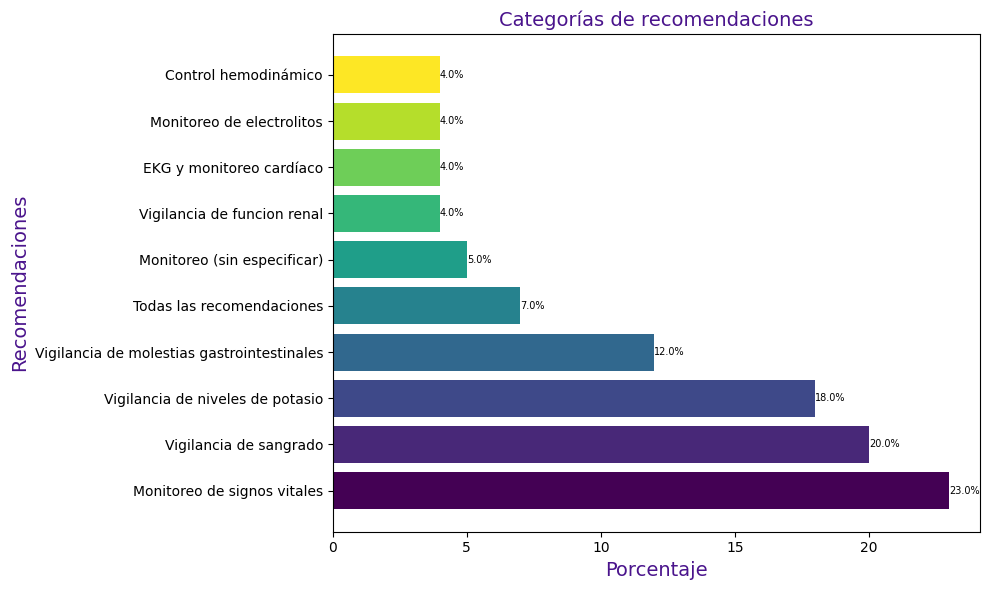

In [ ]:
colors = plt.cm.viridis(np.linspace(0, 1, len(cat['porcent'])))
plt.figure(figsize=(10, 6))
bars = plt.barh(cat['Categoria'], cat['porcent'], color=colors)
for bar, percentage in zip(bars, cat['porcent']):
    plt.text(bar.get_width() , bar.get_y() + bar.get_height() / 2,
             f'{percentage}%', va='center', fontsize=7)
plt.title("Categorías de recomendaciones", fontsize=14, color='#4A148C')
plt.xlabel('P', fontsize=14, color='#4A148C')
plt.ylabel('Recomendaciones', fontsize=14, color='#4A148C')
plt.tight_layout()
plt.show()


In [ ]:
alternativas = df2["¿Utilizó alguna de las alternativas mencionadas en la herramienta?."].value_counts()
print("Uso de alternativas:")
print(alternativas)

Uso de alternativas:
¿Utilizó alguna de las alternativas mencionadas en la herramienta?.
NO    39
SI    14
Name: count, dtype: int64


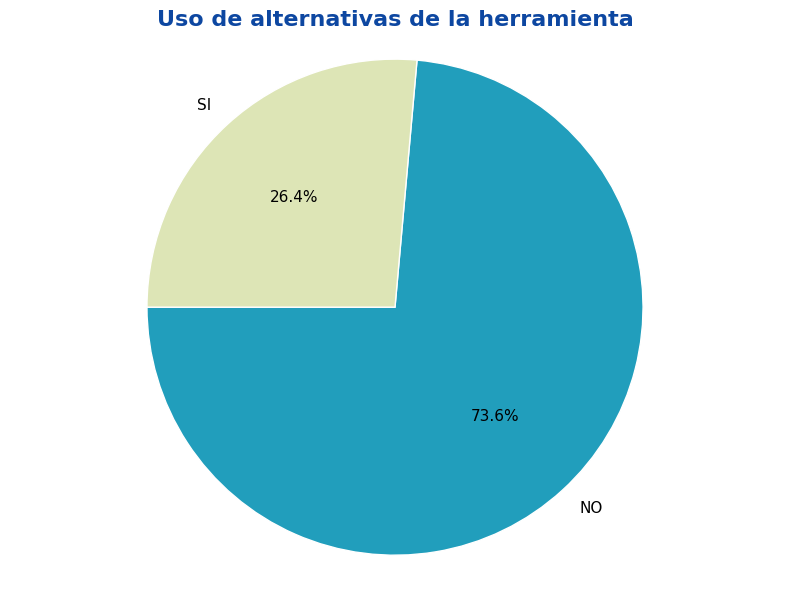

In [ ]:
colores_azules = ['#219ebc', '#dde5b6']
plt.pie(
    alternativas,
    labels=alternativas.index,
    autopct='%1.1f%%',
    startangle=180,
    colors=colores_azules[:len(alternativas)],
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    textprops={'fontsize': 11} 
)
plt.title("Uso de alternativas de la herramienta", fontsize=16, color='#0d47a1', weight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [155]:
efectos = df2['¿Existe alguna otra interacción o efecto adverso, que no esté consignado en la herramienta?'].value_counts()
print("Uso de recomendaciones de la herramienta:")
print(efectos)


Uso de recomendaciones de la herramienta:
¿Existe alguna otra interacción o efecto adverso, que no esté consignado en la herramienta?
No    52
SI     1
Name: count, dtype: int64


## Objetivo 3

In [ ]:
df3 = pd.read_excel('Formulario para la recopilación de Datos (Perfil enfermero)..xlsx')

In [ ]:
df3 = df3.drop(columns=['Hora de inicio', 'Hora de finalización'], errors='ignore')
df3.columns

Index(['Id', 'Nombre ', 'Nivel educativo', 'Areas de desempeño actual',
       'Años de experiencia en UCI'],
      dtype='object')

In [ ]:
print("Conteo por nivel educativo:")
print(df3['Nivel educativo'].value_counts())
print("\nConteo por área de desempeño actual:")
print(df3['Areas de desempeño actual'].value_counts())

Conteo por nivel educativo:
Nivel educativo
Maestría                           4
Especialización cuidado crítico    4
Diplomado cuidado crÍtico          1
Name: count, dtype: int64

Conteo por área de desempeño actual:
Areas de desempeño actual
UCI Adulto         5
UCI                3
UCI intermedio     1
Name: count, dtype: int64


In [ ]:
experiencia = df3['Años de experiencia en UCI']
resumen = {
    'Media': [experiencia.mean()],
    'Mediana': [experiencia.median()],
    'Desviación estándar': [experiencia.std()],
    'Mínimo': [experiencia.min()],
    'Máximo': [experiencia.max()]
}
tabla_resumen = pd.DataFrame(resumen).T
tabla_resumen.columns = ['Valor']
print(tabla_resumen)


                         Valor
Media                 7.888889
Mediana               6.000000
Desviación estándar   4.594683
Mínimo                1.000000
Máximo               15.000000


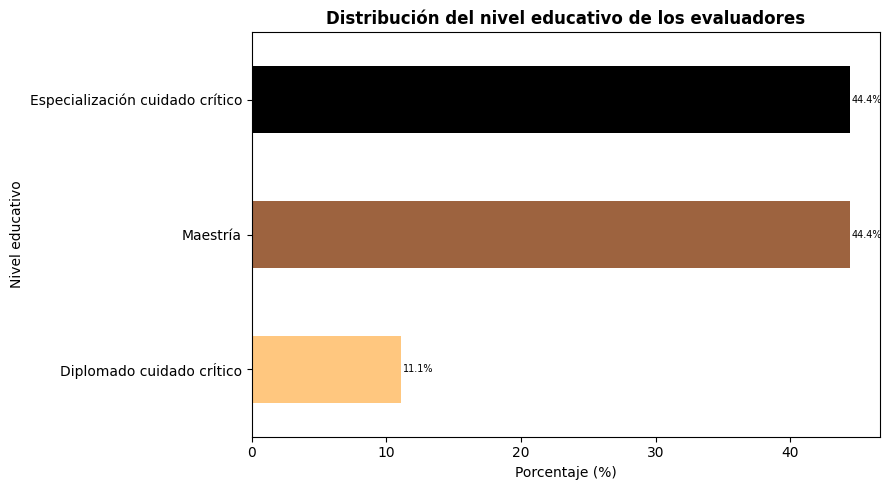

In [ ]:
import matplotlib.cm as cm
porcentajes = df3['Nivel educativo'].value_counts(normalize=True) * 100
porcentajes_ordenados = porcentajes.sort_values()
plt.figure(figsize=(9, 5))
colores = cm.copper_r(np.linspace(0, 1, len(porcentajes_ordenados)))
porcentajes_ordenados.plot(kind='barh', color=colores)
plt.title('Distribución del nivel educativo de los evaluadores',weight= 'bold')
plt.xlabel('Porcentaje (%)')
plt.ylabel('Nivel educativo')
for index, value in enumerate(porcentajes_ordenados):
    plt.text(value + 0.1, index, f'{value:.1f}%',fontsize=7, va='center')

plt.tight_layout()
plt.show()



In [ ]:
df4 = pd.read_excel('Utilidad y confiabilidad de la herramienta _CRIMECRI_ respuestas.xlsx')
df4 = df4.drop(columns=['Hora de inicio', 'Hora de finalización','Correo electrónico','Nombre'], errors='ignore')

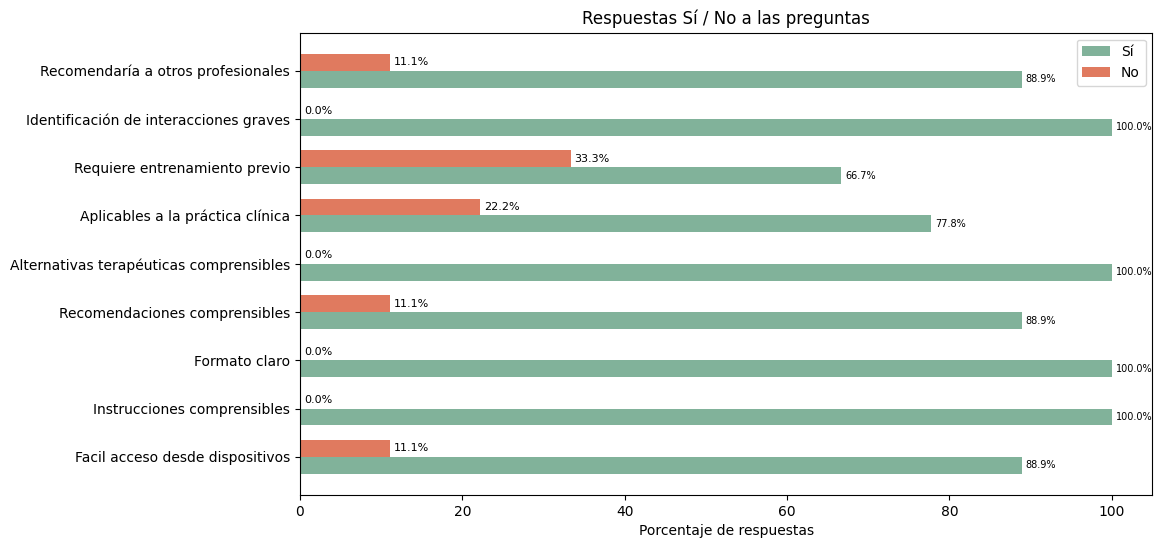

In [ ]:
data = {
    'Pregunta': [
        'Facil acceso desde dispositivos',
        'Instrucciones comprensibles',
        'Formato claro',
        'Recomendaciones comprensibles',
        'Alternativas terapéuticas comprensibles',
        'Aplicables a la práctica clínica',
        'Requiere entrenamiento previo',
        'Identificación de interacciones graves',
        'Recomendaría a otros profesionales'
    ],
    'Sí (n)': [8, 9, 9, 8, 9, 7, 6, 9, 8],
    'No (n)': [1, 0, 0, 1, 0, 2, 3, 0, 1]
}
df = pd.DataFrame(data)
df['Total'] = df['Sí (n)'] + df['No (n)']
df['% Sí'] = (df['Sí (n)'] / df['Total']) * 100
df['% No'] = (df['No (n)'] / df['Total']) * 100
bar_width = 0.35
index = np.arange(len(df))
fig, ax = plt.subplots(figsize=(11, 6))
bars_si = ax.barh(index, df['% Sí'], bar_width, label='Sí', color="#81b29a")
bars_no = ax.barh(index + bar_width, df['% No'], bar_width, label='No', color="#e07a5f")
ax.set_xlabel('Porcentaje de respuestas')
ax.set_title('Respuestas Sí / No a las preguntas')
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(df['Pregunta'])
ax.legend()
for i in range(len(df)):
    ax.text(df['% Sí'][i] + 0.5, i, f"{df['% Sí'][i]:.1f}%", va='center', ha='left', color='black', fontsize=7)
    ax.text(df['% No'][i] + 0.5, i + bar_width, f"{df['% No'][i]:.1f}%", va='center', ha='left', color='black', fontsize=8)

plt.show()


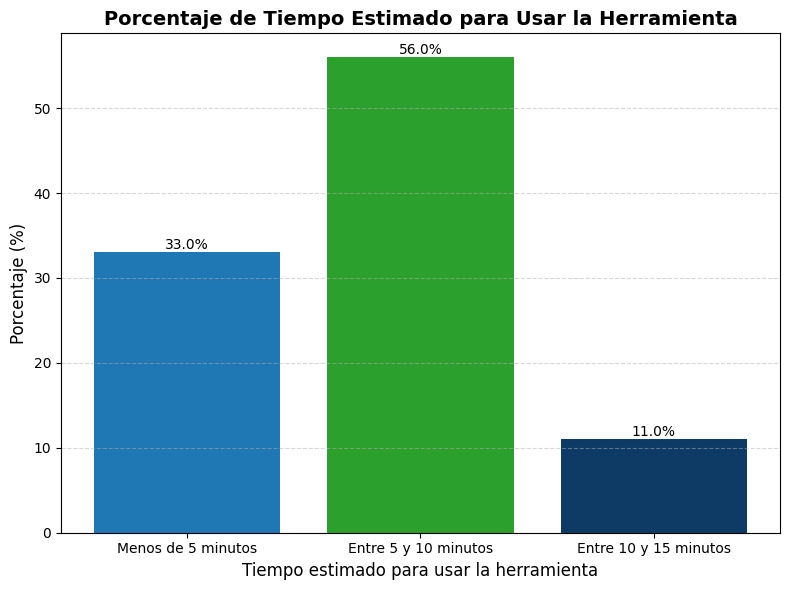

In [ ]:
data = {
    'Tiempo estimado para usar la herramienta': ['Menos de 5 minutos', 'Entre 5 y 10 minutos', 'Entre 10 y 15 minutos'],
    'Frecuencia': [3, 5, 1],
    'Porcentaje': [33, 56, 11]
}
df = pd.DataFrame(data)
colores = ['#1f77b4', '#2ca02c', '#0d3b66']
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(df['Tiempo estimado para usar la herramienta'], df['Porcentaje'], color=colores)
plt.title('Porcentaje de Tiempo Estimado para Usar la Herramienta', fontsize=14, fontweight='bold')
plt.xlabel('Tiempo estimado para usar la herramienta', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xticks(rotation=0)
for i, row in df.iterrows():
    ax.text(i, row['Porcentaje'], f"{row['Porcentaje']:.1f}%", ha='center', va='bottom', fontsize=10, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
